In [106]:
print(__doc__)
import pandas as pd
import numpy as np

# Code source: Gaël Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

from sklearn import decomposition
from sklearn import datasets

%matplotlib notebook

np.random.seed(5)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Automatically created module for IPython interactive environment


In [107]:
centers = [[1, 1], [-1, -1], [1, -1]]

In [108]:
df = pd.read_csv("C:/Users/takedatn/Documents/Synergestic/all.finalscore.07312017.txt", header=None, sep=" ") 

In [109]:
df_max=df.loc[:,[2,3,5,4,6,7,8,9,10,11,13,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,64]]

In [110]:
df_max_no_minus10=df_max[df_max.loc[:,[2,3,5,4,6,7,8,9,10,11,13,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,64]]!=-10]

In [111]:
df_max_no_minus10_bene=df_max_no_minus10[df_max_no_minus10.loc[:,64]==1.0]

In [112]:
df_max_no_minus10_harm=df_max_no_minus10[df_max_no_minus10.loc[:,64]==-1.0]

In [113]:
pop=len(df_max_no_minus10_harm.index)

In [114]:
df_max_no_minus10_noneff=df_max_no_minus10[df_max_no_minus10.loc[:,64]==0.3]

In [115]:
selected_df_max_no_minus10_noneff = df_max_no_minus10_noneff.sample(n=pop)

In [116]:
selected_df_max_no_minus10_noneff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9876 entries, 5105226 to 1014783
Data columns (total 32 columns):
2     9876 non-null float64
3     5017 non-null float64
5     4952 non-null float64
4     2950 non-null float64
6     2935 non-null float64
7     7062 non-null float64
8     7318 non-null float64
9     4783 non-null float64
10    4918 non-null float64
11    5182 non-null float64
13    5210 non-null float64
12    5172 non-null float64
14    5210 non-null float64
15    3722 non-null float64
16    4389 non-null float64
17    3723 non-null float64
18    4373 non-null float64
19    3837 non-null float64
20    3973 non-null float64
21    3467 non-null float64
22    3502 non-null float64
23    4260 non-null float64
24    4337 non-null float64
25    3088 non-null float64
26    3444 non-null float64
27    4207 non-null float64
28    3918 non-null float64
29    3425 non-null float64
30    3567 non-null float64
31    4472 non-null float64
32    4547 non-null float64
64    9876 non-n

In [117]:
selected = pd.concat([selected_df_max_no_minus10_noneff,df_max_no_minus10_harm ], axis=0)

In [118]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19752 entries, 5105226 to 5096496
Data columns (total 32 columns):
2     19752 non-null float64
3     13814 non-null float64
5     13718 non-null float64
4     8589 non-null float64
6     8565 non-null float64
7     15844 non-null float64
8     16389 non-null float64
9     10042 non-null float64
10    10516 non-null float64
11    10913 non-null float64
13    10959 non-null float64
12    10888 non-null float64
14    10959 non-null float64
15    7672 non-null float64
16    9217 non-null float64
17    8015 non-null float64
18    8852 non-null float64
19    7574 non-null float64
20    8260 non-null float64
21    7075 non-null float64
22    7416 non-null float64
23    9008 non-null float64
24    9096 non-null float64
25    6685 non-null float64
26    7579 non-null float64
27    8775 non-null float64
28    8241 non-null float64
29    7195 non-null float64
30    7379 non-null float64
31    9536 non-null float64
32    9691 non-null float64
64  

In [119]:
df_7 = df_max_no_minus10_noneff.sample(n=7)

In [120]:
df_7

,2,3,5,4,6,7,8,9,10,11,...,24,25,26,27,28,29,30,31,32,64
1743965,0.466,0.731,0.731,0.641,0.714,0.663,0.683,0.566,0.283,0.735,...,0.644,NaN,NaN,NaN,NaN,0.578,0.632,0.653,0.644,0.3
1409111,0.327,0.710,0.710,NaN,NaN,0.714,0.668,0.261,0.379,0.614,...,NaN,0.590,0.513,0.590,0.513,0.397,0.630,NaN,NaN,0.3
423141,0.445,0.706,0.713,0.834,0.866,0.778,0.674,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3
3888966,0.193,NaN,NaN,NaN,NaN,0.276,0.479,NaN,0.246,0.420,...,0.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3
3690996,0.233,NaN,NaN,NaN,NaN,0.472,0.411,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3
4556245,0.392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3
3477159,0.322,0.546,0.546,NaN,NaN,0.351,0.770,0.437,0.379,0.487,...,0.389,0.389,0.217,0.331,0.250,0.289,0.336,0.461,0.389,0.3


<IPython.core.display.Javascript object>


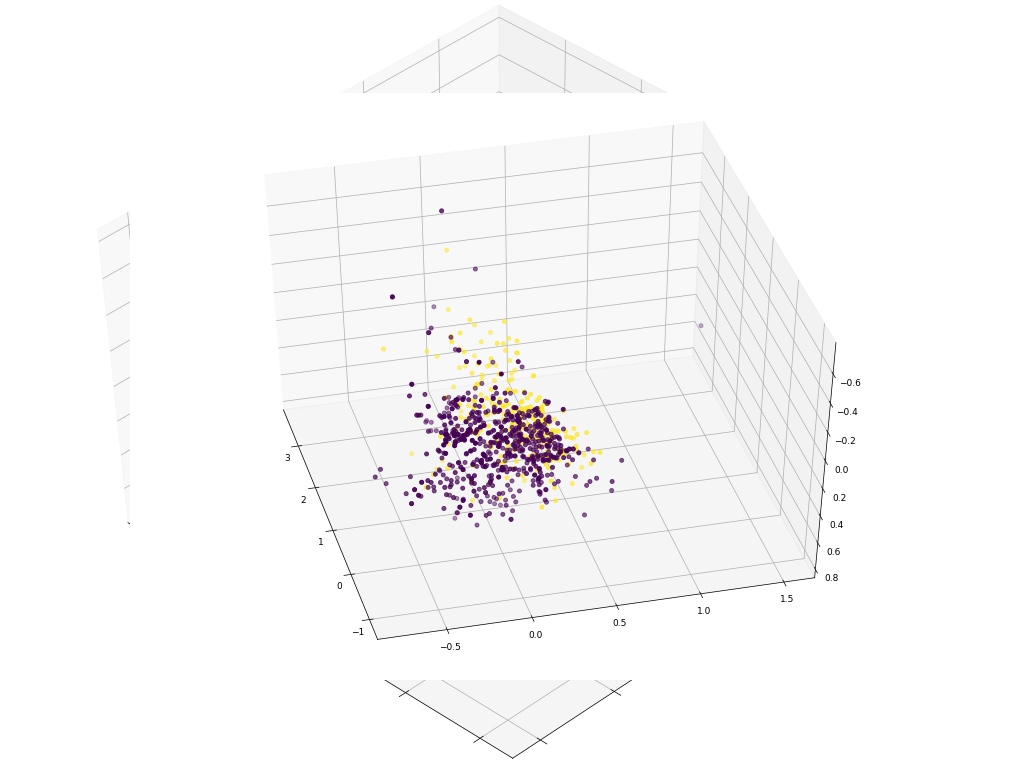

In [121]:
fig = plt.figure(1, figsize=(16,12))

In [122]:
plt.clf()

In [123]:
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

In [124]:
plt.cla()

In [125]:
pca = decomposition.PCA(n_components=31)

In [126]:
selected_noNA=selected.dropna()

In [127]:
df_max_no_minus10_noNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142100 entries, 11 to 5350049
Data columns (total 32 columns):
2     142100 non-null float64
3     142100 non-null float64
5     142100 non-null float64
4     142100 non-null float64
6     142100 non-null float64
7     142100 non-null float64
8     142100 non-null float64
9     142100 non-null float64
10    142100 non-null float64
11    142100 non-null float64
13    142100 non-null float64
12    142100 non-null float64
14    142100 non-null float64
15    142100 non-null float64
16    142100 non-null float64
17    142100 non-null float64
18    142100 non-null float64
19    142100 non-null float64
20    142100 non-null float64
21    142100 non-null float64
22    142100 non-null float64
23    142100 non-null float64
24    142100 non-null float64
25    142100 non-null float64
26    142100 non-null float64
27    142100 non-null float64
28    142100 non-null float64
29    142100 non-null float64
30    142100 non-null float64
31    142100 non-

In [128]:
 y = selected_noNA[64]

In [129]:
X = selected_noNA.loc[:,2:32]

In [130]:
X.head()

,2,3,5,4,6,7,8,9,10,11,...,23,24,25,26,27,28,29,30,31,32
2807593,0.277,0.775,0.888,0.632,0.888,0.993,0.810,0.763,0.993,0.538,...,0.568,0.476,0.525,0.433,0.538,0.465,0.568,0.469,0.538,0.534
4418323,0.361,0.745,0.745,0.730,0.745,0.702,0.713,0.653,0.671,0.704,...,0.702,0.704,0.635,0.466,0.702,0.683,0.635,0.460,0.683,0.602
4664417,0.462,0.711,0.699,0.569,0.665,0.600,0.628,0.641,0.605,0.654,...,0.617,0.640,0.594,0.605,0.605,0.554,0.617,0.605,0.617,0.554
4232524,0.305,0.825,0.910,0.910,0.910,0.825,0.910,0.777,0.693,0.777,...,0.657,0.610,0.657,0.597,0.642,0.611,0.692,0.617,0.724,0.677
2739791,0.172,0.648,0.547,0.744,0.840,0.326,0.457,0.878,0.414,0.387,...,0.387,0.308,0.387,0.267,0.387,0.387,0.241,0.265,0.387,0.265


In [131]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=31, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [132]:
X = pca.transform(X)

In [133]:
ax.scatter(X[:,0],X[:,1],X[:,2], c=y,  cmap=plt.cm.spectral)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [134]:
fig = plt.figure(1, figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2], c=y)

In [ ]:
df_max_bene_harm = pd.concat([df_max_no_minus10_bene, df_max_no_minus10_harm] ,axis=0 )

In [ ]:
df_max_bene_harm_noNA = df_max_bene_harm.dropna()

In [ ]:
df_max_bene_harm_noNA.info()

In [ ]:
pca = decomposition.PCA(n_components=13)

In [ ]:
X = df_max_bene_harm_noNA.loc[:,2:14]

In [ ]:
y = df_max_bene_harm_noNA.loc[:,54]*2

In [ ]:
pca.fit(X)

In [ ]:
X = pca.transform(X)

In [ ]:
fig = plt.figure(1, figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( X[:,0],X[:,1],X[:,2], c=y-1, marker='x', s=20, alpha=0.5)

In [ ]:
ax.view_init(elev=20., azim=20)
       # savefig("movie%d.png" % ii)

In [ ]:
label = [1,-1]
colors = ['red','green','blue','purple']

In [ ]:
cm = plt.get_cmap("RdYlGn")

In [ ]:
col = np.arange(2)

In [ ]:
fig = plt.figure(1, figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(swasp_mag1,swasp_per1,swasp_age1,edgecolor='none',c='r',marker='o',s=35,label='SWASP')
ax.scatter(hyd_mag1,hyd_per1,hyd_age1,edgecolor='none',c='y',marker='o',s=35,label='Hyades')
ax.scatter(pld_mag1,pld_per1,pld_age1,edgecolor='none',c='b',marker='o',s=35,label='Pleiades')


In [ ]:
df_no_minus2=df[df.loc[:,11:14]!=-10]

In [ ]:
X=df_no_minus.loc[:,11:14].dropna()

In [ ]:
 y=np.random.randint(2, size=len(X.index))

In [ ]:
X.info()

In [ ]:
pca.fit(X)

In [ ]:
X = pca.transform(X)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( X[:,0],X[:,1],X[:,2], c=y)